

# Project: US Guns Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

>The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
>>We will load it as the variable 'df'

>The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.
>>We will load it as the variable 'df_census'

## Research Questions



<li><a href="#Q1">1. In Which States have the most Hand guns been registered since November 1998?</a></li>
<li><a href="#Q2">2. Do short gun and Long gun sales have a correlation?</a></li>
<li><a href="#Q3">3. Which month sees the highest number of gun registrations?</a></li>
<li><a href="#Q4">4. Does a higher percentage of children under 18 in a state reflect a lower gun registration amount in that state?</a></li>
<li><a href="#Q5">5. How do the states with most total registrations in this data perform over time?</a></li>
<li><a href="#Q6">6. Which states have the lowest total gun registrations per capita (2016)</a></li>


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set seaborn plot sizes
sns.set(rc={"figure.figsize":(15, 6)})

<a id='wrangling'></a>
## Data Wrangling

### Read Data

First we will read the census data and assess it

In [2]:
#Read census data
df_census = pd.read_csv('U.S. Census Data.csv')
df_census.tail(30)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
55,"All firms, 2012",NaN,"374,153","68,032","499,926","231,959","3,548,449","547,352","326,693","73,418",...,81314,550453,"2,356,748","251,419","75,827","653,193","541,522","114,435","432,980","62,427"
56,"Men-owned firms, 2012",NaN,"203,604","35,402","245,243","123,158","1,852,580","284,554","187,845","38,328",...,42418,302249,"1,251,696","132,163","41,270","353,012","262,650","63,112","236,252","30,039"
57,"Women-owned firms, 2012",NaN,"137,630","22,141","182,425","75,962","1,320,085","194,508","106,678","23,964",...,23722,195694,"866,678","76,269","23,417","236,290","187,677","39,065","133,859","19,344"
58,"Minority-owned firms, 2012",NaN,"92,219","13,688","135,313","35,982","1,619,857","85,849","56,113","14,440",...,4101,105234,"1,070,392","24,423","2,354","185,043","92,807","5,777","40,507","4,077"
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [3]:

#Read guns data
df = pd.read_csv('gun_data_csv.csv')
df.head(30)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


### Data Cleaning (Census data)

Now let's look into the census data. There's a lot of work to do here because the data is untidy, messy, you name it.

First off, A quick look at the last 30 rows will show that there's some description data there that is not going to directly be useful in analysis and so I have copied them to another file and we'll drop those rows from the DataFrame here

In [4]:
df_census = df_census[:65]
df_census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


Next, we see that the columns are states and the rows are observations. I think this data will be easier to work with if the rows were the columns and the columns were the rows. So imma transpose the DataFrame

In [5]:
df_census = df_census.transpose()
df_census

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""


This looks better already. Now, we see that the first row contains which serves as the DataFrame column name is a number, while the second row contains the actual column names.

We will now use these two things to create a dataframe which will serve as a data dictionary for us

In [6]:
census_column_names = list(df_census.columns)
census_column_meanings = df_census.iloc[0,:].tolist()

In [7]:
data_dictionary = pd.DataFrame({'Column_name': census_column_names,
                                'Column_meaning': census_column_meanings})
print(data_dictionary.head(31))
data_dictionary.tail(35)

    Column_name                                     Column_meaning
0             0       Population estimates, July 1, 2016,  (V2016)
1             1  Population estimates base, April 1, 2010,  (V2...
2             2  Population, percent change - April 1, 2010 (es...
3             3                  Population, Census, April 1, 2010
4             4  Persons under 5 years, percent, July 1, 2016, ...
5             5      Persons under 5 years, percent, April 1, 2010
6             6  Persons under 18 years, percent, July 1, 2016,...
7             7     Persons under 18 years, percent, April 1, 2010
8             8  Persons 65 years and over, percent,  July 1, 2...
9             9  Persons 65 years and over, percent, April 1, 2010
10           10   Female persons, percent,  July 1, 2016,  (V2016)
11           11             Female persons, percent, April 1, 2010
12           12       White alone, percent, July 1, 2016,  (V2016)
13           13  Black or African American alone, percent, Jul

,Column_name,Column_meaning
30,30,"Households, 2011-2015"
31,31,"Persons per household, 2011-2015"
32,32,"Living in same house 1 year ago, percent of pe..."
33,33,"Language other than English spoken at home, pe..."
34,34,"High school graduate or higher, percent of per..."
35,35,"Bachelor's degree or higher, percent of person..."
36,36,"With a disability, under age 65 years, percent..."
37,37,"Persons without health insurance, under age 6..."
38,38,"In civilian labor force, total, percent of pop..."
39,39,"In civilian labor force, female, percent of po..."


Now, I'll save this dataframe as a csv file for easy viewing in some spreadsheet software. We shall make reference to it often

In [8]:
data_dictionary.to_csv('Census_data_dictionary.csv', index = False)

Now, remove the row with the actual column names. 'Fact', together with the 'Facts Note' row which makes our data untidy.
We are removing the column names because they are too long.

In [9]:
df_census.drop(['Fact', 'Fact Note'], inplace = True)

In [10]:
df_census.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


Now let's see what we have

In [11]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       50 non-null     object
 1   1       50 non-null     object
 2   2       50 non-null     object
 3   3       50 non-null     object
 4   4       50 non-null     object
 5   5       50 non-null     object
 6   6       50 non-null     object
 7   7       50 non-null     object
 8   8       50 non-null     object
 9   9       50 non-null     object
 10  10      50 non-null     object
 11  11      50 non-null     object
 12  12      50 non-null     object
 13  13      50 non-null     object
 14  14      50 non-null     object
 15  15      50 non-null     object
 16  16      50 non-null     object
 17  17      50 non-null     object
 18  18      50 non-null     object
 19  19      50 non-null     object
 20  20      50 non-null     object
 21  21      50 non-null     object
 22  22      50 non-null   

No Nulls. Suuuuuweeeeeet. However, all the columns contain string objects, which we cannot perform mathematical operations on. We would need to change those to numbers eventually. But let's move (cos we've got nothing to prove, lol)

Let's look at the first column, which from our data dictionary,  is 'Population estimates, July 1, 2016,  (V2016)'

In [12]:
df_census.iloc[:,0].head(35)

Alabama            4,863,300
Alaska               741,894
Arizona            6,931,071
Arkansas           2,988,248
California        39,250,017
Colorado           5,540,545
Connecticut        3,576,452
Delaware             952,065
Florida           20,612,439
Georgia           10,310,371
Hawaii             1,428,557
Idaho              1,683,140
Illinois          12,801,539
Indiana            6,633,053
Iowa               3,134,693
Kansas             2,907,289
Kentucky           4,436,974
Louisiana          4,681,666
Maine              1,331,479
Maryland           6,016,447
Massachusetts      6,811,779
Michigan           9,928,300
Minnesota          5,519,952
Mississippi        2,988,726
Missouri           6,093,000
Montana            1,042,520
Nebraska           1,907,116
Nevada             2,940,058
New Hampshire      1,334,795
New Jersey         8,944,469
New Mexico           2081015
New York            19745289
North Carolina      10146788
North Dakota          757952
Ohio          

See that there's some unneeded commas in there, separating the figures. Well, let's not hate on them, since they make our understanding of those numbers easier. But my computer doesn't think so, so errr.

### Data Cleaning, Stage 2 :- (Harder!)

Now, if you do some visual assessment on the census data we have at this point, in a spreadsheet, you'll find a problem with the structure. From Between states New Mexico and Tenesse, in columns 2, 4-19, 21, 24, 32-39, 49 and 53, the values have been written as fractions, while for the others have been written as percentages

Here's a quick demonstration of what I mean. Let's look at data from columns 5 to 10, from states Nevada to Washington

In [13]:
df_census.loc['Nevada':'Washington', 5:10]

,5,6,7,8,9,10
Nevada,6.90%,23.00%,24.60%,15.00%,12.00%,49.90%
New Hampshire,5.30%,19.50%,21.80%,17.00%,13.50%,50.50%
New Jersey,6.20%,22.20%,23.50%,15.30%,13.50%,51.20%
New Mexico,0.07,0.236,0.252,0.165,0.132,0.505
New York,0.06,0.212,0.223,0.154,0.135,0.514
North Carolina,0.066,0.227,0.239,0.155,0.129,0.514
North Dakota,0.066,0.233,0.223,0.145,0.145,0.487
Ohio,0.062,0.225,0.237,0.162,0.141,0.51
Oklahoma,0.07,0.245,0.248,0.15,0.135,0.505
Oregon,0.062,0.212,0.226,0.168,0.139,0.505


Further checking will show that the columns I identified, are the columns where the original lengthy column name contains the word 'percent'. Let me show you the columns

In [14]:
percent_columns = data_dictionary[data_dictionary['Column_meaning'].str.contains('percent')]
percent_columns

,Column_name,Column_meaning
2,2,"Population, percent change - April 1, 2010 (es..."
4,4,"Persons under 5 years, percent, July 1, 2016, ..."
5,5,"Persons under 5 years, percent, April 1, 2010"
6,6,"Persons under 18 years, percent, July 1, 2016,..."
7,7,"Persons under 18 years, percent, April 1, 2010"
8,8,"Persons 65 years and over, percent, July 1, 2..."
9,9,"Persons 65 years and over, percent, April 1, 2010"
10,10,"Female persons, percent, July 1, 2016, (V2016)"
11,11,"Female persons, percent, April 1, 2010"
12,12,"White alone, percent, July 1, 2016, (V2016)"


Yep. I was right. Heck, I always am 😂.

So let's extract the column names from the data dictionary. We will use it to repair the census data

In [15]:
print(percent_columns['Column_name'].tolist())

[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 32, 33, 34, 35, 36, 37, 38, 39, 49, 53]


Sweet. Now, using these column names, and knowing the rows with the problem, we can extract exactly the data with the problem. Here's how

In [16]:
df_census.loc['New Mexico': 'Tennessee', percent_columns['Column_name'].tolist()]

,2,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,49,53
New Mexico,0.011,0.062,0.07,0.236,0.252,0.165,0.132,0.505,0.506,0.826,...,0.857,0.357,0.842,0.263,0.101,0.108,0.591,0.549,0.198,0.039
New York,0.019,0.059,0.06,0.212,0.223,0.154,0.135,0.514,0.516,0.699,...,0.891,0.304,0.856,0.342,0.074,0.07,0.633,0.587,0.147,0.018
North Carolina,0.064,0.06,0.066,0.227,0.239,0.155,0.129,0.514,0.513,0.71,...,0.847,0.112,0.858,0.284,0.096,0.122,0.618,0.577,0.154,0.031
North Dakota,0.127,0.073,0.066,0.233,0.223,0.145,0.145,0.487,0.495,0.879,...,0.822,0.056,0.917,0.277,0.068,0.081,0.693,0.65,0.107,0.014
Ohio,0.007,0.06,0.062,0.225,0.237,0.162,0.141,0.51,0.512,0.825,...,0.853,0.067,0.891,0.261,0.099,0.066,0.633,0.59,0.146,0.018
Oklahoma,0.046,0.068,0.07,0.245,0.248,0.15,0.135,0.505,0.505,0.746,...,0.826,0.098,0.869,0.241,0.113,0.161,0.611,0.557,0.163,0.008
Oregon,0.068,0.058,0.062,0.212,0.226,0.168,0.139,0.505,0.505,0.874,...,0.819,0.151,0.898,0.308,0.102,0.073,0.621,0.576,0.133,0.038
Pennsylvania,0.006,0.056,0.057,0.209,0.22,0.174,0.154,0.51,0.513,0.824,...,0.88,0.106,0.892,0.286,0.095,0.067,0.628,0.583,0.129,0.01
Rhode Island,0.003,0.052,0.055,0.197,0.213,0.165,0.144,0.514,0.517,0.844,...,0.866,0.214,0.862,0.319,0.089,0.051,0.655,0.616,0.128,0.01
South Carolina,0.073,0.059,0.065,0.221,0.234,0.167,0.137,0.515,0.514,0.685,...,0.847,0.069,0.856,0.258,0.103,0.119,0.601,0.562,0.153,0.028


This is the culprit data. Now, all we have to do is multiply every value in this dataframe by 100 to get the actual percentage values. Let's confirm that a mathematical operation can work on this

In [17]:
df_census.loc['New Mexico': 'Tennessee', percent_columns['Column_name'].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, New Mexico to Tennessee
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       12 non-null     object
 1   4       12 non-null     object
 2   5       12 non-null     object
 3   6       12 non-null     object
 4   7       12 non-null     object
 5   8       12 non-null     object
 6   9       12 non-null     object
 7   10      12 non-null     object
 8   11      12 non-null     object
 9   12      12 non-null     object
 10  13      12 non-null     object
 11  14      12 non-null     object
 12  15      12 non-null     object
 13  16      12 non-null     object
 14  17      12 non-null     object
 15  18      12 non-null     object
 16  19      12 non-null     object
 17  21      12 non-null     object
 18  32      12 non-null     object
 19  33      12 non-null     object
 20  34      12 non-null     object
 21  35      12 non-null     object
 22  36      12 non-nu

Nope. Everything is a string. Lucky we checked eh. (Actually I did it without checking and got what you'd think, lol). Now let's change everything to floats

In [18]:
df_census.loc['New Mexico': 'Tennessee', percent_columns['Column_name'].tolist()].astype(float).info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, New Mexico to Tennessee
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       12 non-null     float64
 1   4       12 non-null     float64
 2   5       12 non-null     float64
 3   6       12 non-null     float64
 4   7       12 non-null     float64
 5   8       12 non-null     float64
 6   9       12 non-null     float64
 7   10      12 non-null     float64
 8   11      12 non-null     float64
 9   12      12 non-null     float64
 10  13      12 non-null     float64
 11  14      12 non-null     float64
 12  15      12 non-null     float64
 13  16      12 non-null     float64
 14  17      12 non-null     float64
 15  18      12 non-null     float64
 16  19      12 non-null     float64
 17  21      12 non-null     float64
 18  32      12 non-null     float64
 19  33      12 non-null     float64
 20  34      12 non-null     float64
 21  35      12 non-null     float6

Now, to the operation

In [19]:
df_census.loc['New Mexico': 'Tennessee', percent_columns['Column_name'].tolist()].astype(float).apply(lambda x: x*100)

,2,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,49,53
New Mexico,1.1,6.2,7.0,23.6,25.2,16.5,13.2,50.5,50.6,82.6,...,85.7,35.7,84.2,26.3,10.1,10.8,59.1,54.9,19.8,3.9
New York,1.9,5.9,6.0,21.2,22.3,15.4,13.5,51.4,51.6,69.9,...,89.1,30.4,85.6,34.2,7.4,7.0,63.3,58.7,14.7,1.8
North Carolina,6.4,6.0,6.6,22.7,23.9,15.5,12.9,51.4,51.3,71.0,...,84.7,11.2,85.8,28.4,9.6,12.2,61.8,57.7,15.4,3.1
North Dakota,12.7,7.3,6.6,23.3,22.3,14.5,14.5,48.7,49.5,87.9,...,82.2,5.6,91.7,27.7,6.8,8.1,69.3,65.0,10.7,1.4
Ohio,0.7,6.0,6.2,22.5,23.7,16.2,14.1,51.0,51.2,82.5,...,85.3,6.7,89.1,26.1,9.9,6.6,63.3,59.0,14.6,1.8
Oklahoma,4.6,6.8,7.0,24.5,24.8,15.0,13.5,50.5,50.5,74.6,...,82.6,9.8,86.9,24.1,11.3,16.1,61.1,55.7,16.3,0.8
Oregon,6.8,5.8,6.2,21.2,22.6,16.8,13.9,50.5,50.5,87.4,...,81.9,15.1,89.8,30.8,10.2,7.3,62.1,57.6,13.3,3.8
Pennsylvania,0.6,5.6,5.7,20.9,22.0,17.4,15.4,51.0,51.3,82.4,...,88.0,10.6,89.2,28.6,9.5,6.7,62.8,58.3,12.9,1.0
Rhode Island,0.3,5.2,5.5,19.7,21.3,16.5,14.4,51.4,51.7,84.4,...,86.6,21.4,86.2,31.9,8.9,5.1,65.5,61.6,12.8,1.0
South Carolina,7.3,5.9,6.5,22.1,23.4,16.7,13.7,51.5,51.4,68.5,...,84.7,6.9,85.6,25.8,10.3,11.9,60.1,56.2,15.3,2.8


Looks good eh😏. Yeah I know, I'm good😂

Now let's replace the old data with this ultra modern classic

In [20]:
df_census.loc['New Mexico': 'Tennessee', percent_columns['Column_name'].tolist()] = (df_census.loc['New Mexico': 'Tennessee',
                                                                                                   percent_columns['Column_name']
                                                                                                   .tolist()]
                                                                                                   .astype(float)
                                                                                                   .apply(lambda x: x*100))

Let's check to confirm that the change was made

In [21]:
df_census.loc['Nevada':'Washington', 5:10]

,5,6,7,8,9,10
Nevada,6.90%,23.00%,24.60%,15.00%,12.00%,49.90%
New Hampshire,5.30%,19.50%,21.80%,17.00%,13.50%,50.50%
New Jersey,6.20%,22.20%,23.50%,15.30%,13.50%,51.20%
New Mexico,7.0,23.6,25.2,16.5,13.2,50.5
New York,6.0,21.2,22.3,15.4,13.5,51.4
North Carolina,6.6,22.7,23.9,15.5,12.9,51.4
North Dakota,6.6,23.3,22.3,14.5,14.5,48.7
Ohio,6.2,22.5,23.7,16.2,14.1,51.0
Oklahoma,7.0,24.5,24.8,15.0,13.5,50.5
Oregon,6.2,21.2,22.6,16.8,13.9,50.5


Perfect. Now all we have to do is remove the percentage signs visible here and comma signs like the ones we saw earlier so that we can then change all of the data to floats that we can perform operations on. (Actually there's more work, but let's move)(cos we gat... lol)

At this point, imma save this to a CSV, just so that I can have a proper look at what exactly is goig on in there

In [22]:
df_census.to_csv('Census_data (Fractions changed to percentages).csv', index = True)

Now, you have a quick glance

In [23]:
df_census

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


Without wasting too much time, let's just jump right into it, shall we?

The code below does the following:
1. Deletes % signs from the data
2. Deletes " sign from last column (Which I now realise that we actually don't need😐😐, why didn't we just drop it? I trusted you😣)
3. Deletes dollar signs
4. Replaces Z with 0. [Z represents Value greater than zero but less than half unit of measure shown, (don't worry about it. I don't know what that is too😂)]
5. Replaces D with a null value (let's just leave this😂)
6. Replaces FN with a null value
7. Converts all values in the DataFrame into floats

In [24]:
(df_census.astype(str) .apply(lambda x: x.str.replace(',', ''))
.apply(lambda x: x.str.replace('%', ''))
 .apply(lambda x: x.str.replace('"', ''))
 .apply(lambda x: x.str.replace('Z', '0'))
.apply(lambda x: x.str.replace('$', ''))
.apply(lambda x: x.replace('D', np.NaN))
 .apply(lambda x: x.replace('FN', np.NaN))
).astype(float)

<ipython-input-24-e90ee8ab6201>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  .apply(lambda x: x.str.replace('$', ''))


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.7,16.1,13.8,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,1.0
Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.2,26.4,10.4,7.7,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,2.0
Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.5,25.5,16.9,13.8,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,4.0
Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.6,24.4,16.3,14.4,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,5.0
California,39250017.0,37254522.0,5.4,37253956.0,6.3,6.8,23.2,25.0,13.6,11.4,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,6.0
Colorado,5540545.0,5029324.0,10.2,5029196.0,6.1,6.8,22.8,24.4,13.4,10.9,...,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,48.5,103641.89,8.0
Connecticut,3576452.0,3574114.0,0.1,3574097.0,5.2,5.7,21.1,22.9,16.1,14.2,...,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,738.1,4842.36,9.0
Delaware,952065.0,897936.0,6.0,897934.0,5.8,6.2,21.5,22.9,17.5,14.4,...,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,460.8,1948.54,10.0
Florida,20612439.0,18804592.0,9.6,18801310.0,5.5,5.7,20.1,21.3,19.9,17.3,...,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,350.6,53624.76,12.0
Georgia,10310371.0,9688680.0,6.4,9687653.0,6.4,7.1,24.4,25.7,13.1,10.7,...,929864.0,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,168.4,57513.49,13.0


Looks good. Now, to update the variable

In [25]:
df_census = (df_census.astype(str) .apply(lambda x: x.str.replace(',', ''))
                   .apply(lambda x: x.str.replace('%', ''))
                    .apply(lambda x: x.str.replace('"', ''))
                    .apply(lambda x: x.str.replace('Z', '0'))
                    .apply(lambda x: x.str.replace('$', ''))
                    .apply(lambda x: x.replace('D', np.NaN))
                    .apply(lambda x: x.replace('FN', np.NaN))).astype(float)

<ipython-input-25-48bed4309019>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  .apply(lambda x: x.str.replace('$', ''))


In [26]:
df_census.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.7,16.1,13.8,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,1.0
Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.2,26.4,10.4,7.7,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,2.0
Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.5,25.5,16.9,13.8,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,4.0
Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.6,24.4,16.3,14.4,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,5.0
California,39250017.0,37254522.0,5.4,37253956.0,6.3,6.8,23.2,25.0,13.6,11.4,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,6.0


Pheeew. The data is finally clean. Let me save a copy to display in my sitting room

In [27]:
df_census.to_csv('census_final.csv')

In [28]:
df_census.transpose().iloc[0,:].tolist()

[4863300.0,
 741894.0,
 6931071.0,
 2988248.0,
 39250017.0,
 5540545.0,
 3576452.0,
 952065.0,
 20612439.0,
 10310371.0,
 1428557.0,
 1683140.0,
 12801539.0,
 6633053.0,
 3134693.0,
 2907289.0,
 4436974.0,
 4681666.0,
 1331479.0,
 6016447.0,
 6811779.0,
 9928300.0,
 5519952.0,
 2988726.0,
 6093000.0,
 1042520.0,
 1907116.0,
 2940058.0,
 1334795.0,
 8944469.0,
 2081015.0,
 19745289.0,
 10146788.0,
 757952.0,
 11614373.0,
 3923561.0,
 4093465.0,
 12784227.0,
 1056426.0,
 4961119.0,
 865454.0,
 6651194.0,
 27862596.0,
 3051217.0,
 624594.0,
 8411808.0,
 7288000.0,
 1831102.0,
 5778708.0,
 585501.0]

### Data Exploration :- Guns (Ratatata)

Here, the exploration of the guns data begins

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [30]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


Let's look at the months whose data is represented here

In [31]:
pd.Series(df['month'].unique()).aggregate(['min', 'max'])

min    1998-11
max    2017-09
dtype: object

So we have from November  1998 to September 2017. Cool

In [32]:
len(df['month'].unique())

227

So there's data for 227 months here

Let's check to confirm that the states column contains all 50 states in the US

In [33]:
data_states = df['state'].unique().tolist()
data_states.sort()
print(data_states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [34]:
len(df['state'].unique())

55

Hmm. 55. That's strange. What is going on? Just glancing, I see Guam. What's Guam?

Lol alright alright play's over. I googled it and saw that 5 other territories of the US have been included in this data.

In [35]:
other_territories = ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']

But, I want to focus this analysis on only states that are directly within the US. So, I will drop all information about the other states

In [36]:
#create a mask to collect all the data whose states is in 'other_territories'
mask = df['state'].isin(other_territories)
#use the mask to collect data where states is not in 'other_territories'. The tilda sign negates the mask
df = df[~mask]

In [37]:
df['state']

0              Alabama
1               Alaska
2              Arizona
3             Arkansas
4           California
             ...      
12480         Virginia
12481       Washington
12482    West Virginia
12483        Wisconsin
12484          Wyoming
Name: state, Length: 11350, dtype: object

The next 2 cells show how I realised what the other territories are. 
>First, I went to find a ready made python list of the 50 main US states (What? It's not illegal, is it?). 

>Then I made a list of all the states in this data, put them both as columns of a DataFrame, for easy visual assessment

In [38]:
st = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
len(st)
st.sort()
st

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [39]:
pd.DataFrame({ 'This data' : pd.Series(data_states).sort_index(), 'The other': pd.Series(st).sort_index()}, index = range(55))

,This data,The other
0,Alabama,Alabama
1,Alaska,Alaska
2,Arizona,American Samoa
3,Arkansas,Arizona
4,California,Arkansas
5,Colorado,California
6,Connecticut,Colorado
7,Delaware,Connecticut
8,District of Columbia,Delaware
9,Florida,District of Columbia


For us to be able to make analysis and compare variables by month, we'd have to do some wrangling of the current month column, to extract the month number, which we can then use to get the month name

In [40]:
month_dict = {'01':'Janauary',
    '02':'February',
    '03':'March',
    '04':'April',
    '05':'May',
    '06':'June',
    '07':'July',
    '08':'August',
    '09':'September',
    '10':'October',
    '11':'November',
    '12':'December'}

In [41]:
df['month'].apply(lambda x:x[-2:]).replace(month_dict)
    
df['month_name'] = df['month'].apply(lambda x:x[-2:]).replace(month_dict)

Let's make a year column so that we will be able to perform some analysis by year later

In [42]:
df['year'] = df['month'].str.split('-', expand=True)[0]

Now here's what we have

In [43]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,month_name,year
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,September,2017
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,September,2017
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,September,2017
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,September,2017
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,September,2017


<a id='eda'></a>
# Exploratory Data Analysis



<a id='Q1'></a>
### Question 1 In Which States have the most Hand guns been registered since November 1998?

To answer this, we have to group the data by states and find the average short gun sales. then let's see what the highest 10 look like

In [44]:
total_guns_per_state = df.groupby('state')['handgun'].sum().sort_values().tail(10)
total_guns_per_state.sort_values(ascending=False)

state
Texas         6493832.0
California    5910880.0
Florida       5909952.0
Ohio          3791457.0
Tennessee     3117004.0
Virginia      2885493.0
Colorado      2528422.0
Illinois      2434983.0
Missouri      2418598.0
Alabama       2222037.0
Name: handgun, dtype: float64

A bar chart would be a good way to visualise this. Let's see

Let us define a function which we will use for plotting bar charts

In [77]:
def plot_bar(series = None, yticks = None, y_tick_labels = None, title = None, title_fontsize = 12, figsize = (15,5)):
    """
    This function takes in a pandas Series and returns a matplotlib barchart
    
    Parameters:
    
    series : The pandas Series to plot
    yticks : This parameter is the list of xtick locations
    y_tick_labels : This parameter contains labels to place at the given ticks locations.
    title : This parameter represents the plot title
    title_fontsize : Represents the size of the title text
    figsize : Represents the size of the plot.
    
    Returns:
        matplotlib plot
    
    """
    series.plot(kind = 'bar', figsize = (15,5))
    plt.yticks(yticks, labels = pd.Series(y_tick_labels).apply(lambda x: f'{x:,}'))
    plt.title(title, fontsize = title_fontsize)

Now let's use our function

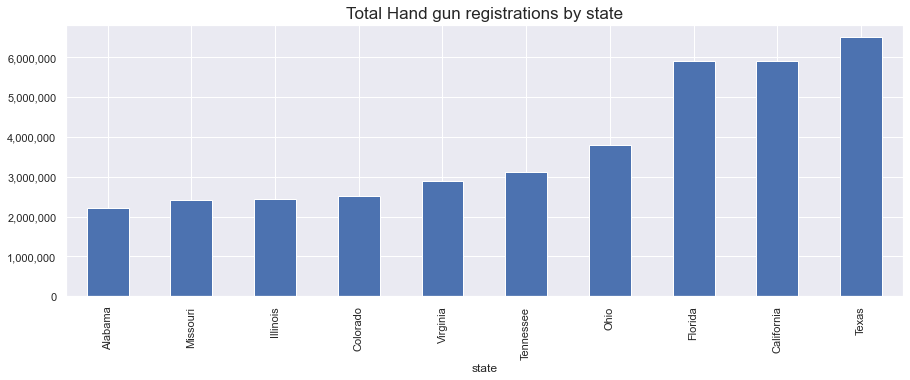

In [72]:
plot_bar(series = total_guns_per_state,
         yticks = range(0,7_000_000, 1_000_000),
         y_tick_labels = range(0,7_000_000, 1_000_000),
         title = 'Total Hand gun registrations by state',
         title_fontsize = 17)

Texas. The home of cowboys. Of course, lol. [Here's an article about guns in texas](https://www.texasmonthly.com/articles/everything-you-ever-wanted-to-know-about-guns-in-texas/)

Let's look at highest number of registrations recoded in any month, for all the states

In [70]:
max_guns_one_month_per_state = df.groupby('state')['handgun'].max().sort_values().tail(10)
max_guns_one_month_per_state

state
Missouri         43300.0
Indiana          44150.0
Alabama          47605.0
Tennessee        51923.0
Ohio             60280.0
Illinois         60745.0
California       74399.0
Florida          86940.0
Pennsylvania     90055.0
Texas           107224.0
Name: handgun, dtype: float64

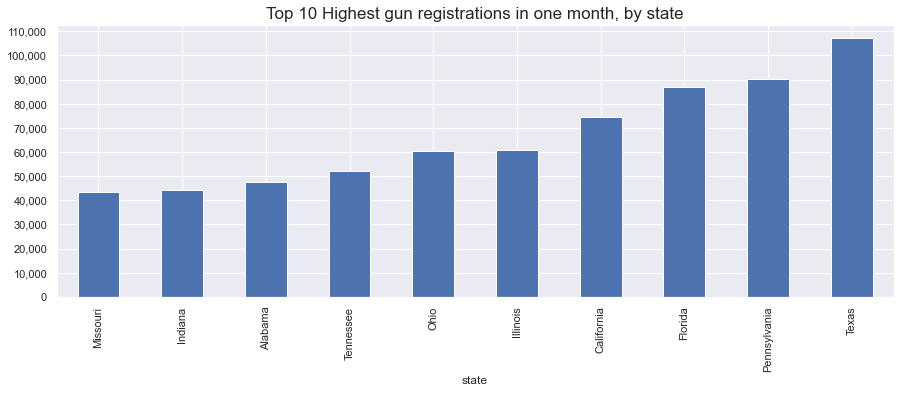

In [75]:
plot_bar(series = max_guns_one_month_per_state,
         yticks = range(0,120_000, 10_000),
         y_tick_labels = range(0,120_000, 10_000),
         title = 'Top 10 Highest gun registrations in one month, by state',
         title_fontsize = 17)

I have a hunch that this value has come correlation with the population of the state. let's look at it with a scatterplot

>Each state's population is in the column 0 of the census data (df_census[0])

Correlation coefficient:  0.7476731862920917


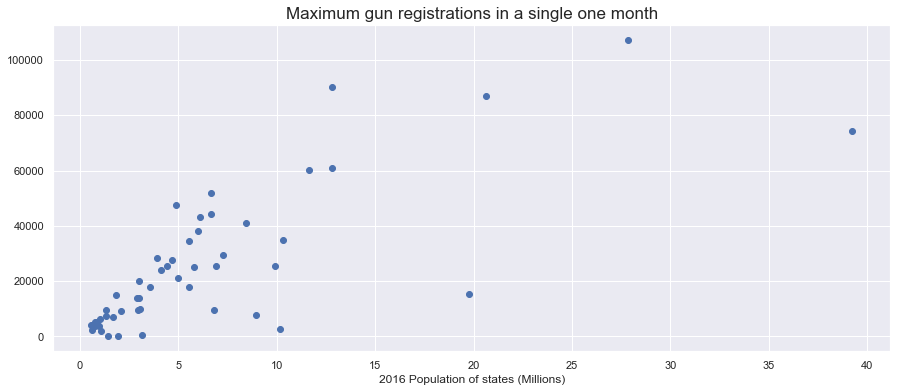

In [76]:
ax = plt.scatter(df_census[0]/1_000_000, df.groupby('state')['handgun'].max().sort_index())
plt.xlabel('2016 Population of states (Millions)')

plt.title('Maximum gun registrations in a single one month', fontsize = 17);
print('Correlation coefficient: ', df.groupby('state')['handgun'].max().sort_index().corr(df_census[0]))

I guess I was right

<a id='Q2'></a>
### Research Question 2  Do short gun and Long gun sales have a correlation?

A simple scatterplot would do the trick

Correlation coefficient:  0.5569442740785172


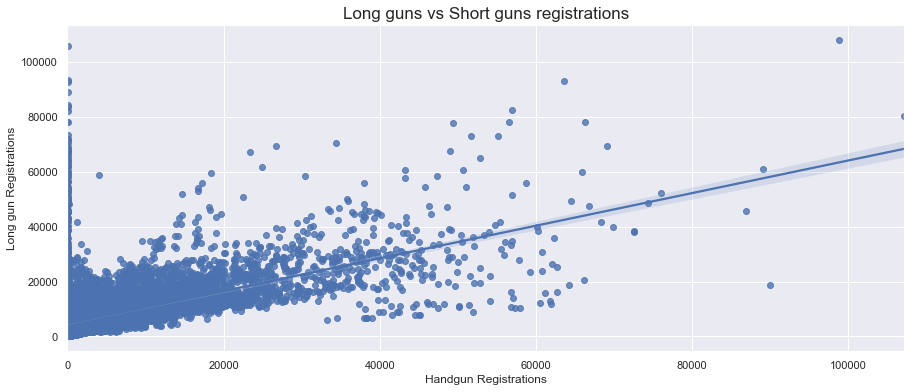

In [79]:
sns.regplot(data = df, x = 'handgun', y = 'long_gun')
sns.set();
plt.xlabel('Handgun Registrations')
plt.ylabel('Long gun Registrations')
plt.title('Long guns vs Short guns registrations', fontsize = 17)
print('Correlation coefficient: ', df['handgun'].corr(df['long_gun']))

Yeah, there seems to be a slight positive correlation

<a id='Q3'></a>
### Research Question 3  : Which month sees the highest number of gun registrations?

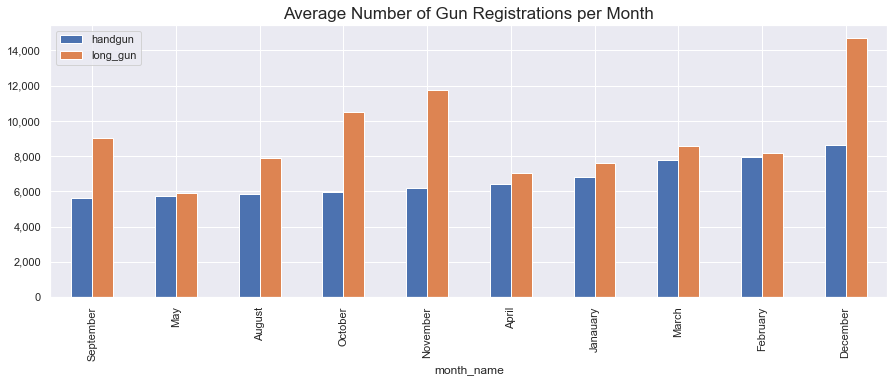

In [83]:
average_guns_per_month = df.groupby('month_name')[['handgun', 'long_gun']].mean().sort_values('handgun').tail(10)

#Plot using our function

plot_bar(series = average_guns_per_month,
         yticks = range(0,15_000, 2000),
         y_tick_labels = range(0,15_000, 2000),
         title = 'Average Number of Gun Registrations per Month',
         title_fontsize = 17)

In [51]:
#Print this data, sorted by long gun values in descending order
average_guns_per_month.sort_values(by = 'long_gun', ascending = False)

,handgun,long_gun
month_name,,
December,8655.750526,14694.358947
November,6217.517895,11768.221053
October,5969.323333,10509.295556
September,5650.937895,9007.414737
March,7765.867368,8552.310526
February,7952.749474,8175.917895
August,5843.590526,7916.142105
Janauary,6834.014737,7616.927368
April,6429.565263,7061.382105


December has the highest number of handgun and long gun registrations. November has the next highest number of long gun registrations but ranks 6th in short gun registrations

Let's Look at how the months stand in terms of total gun registrations

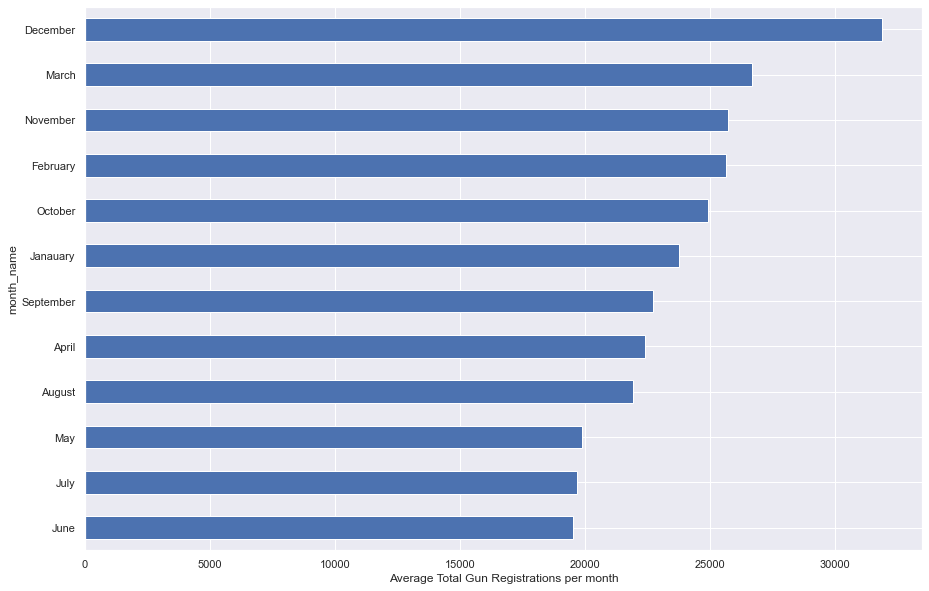

In [52]:

df.groupby('month_name')['totals'].mean().sort_values().plot(kind = 'barh', figsize = (15, 10))

plt.xlabel('Average Total Gun Registrations per month');

December and March have the highest total gun registrations, with June having the least

<a id='Q4'></a>
### Research Question 4:   Does a higher percentage of children under 18 in a state reflect a lower gun registration amount in that state?

To get this information:
1. Find the total number of gun sales in each state in 2016 and divide this number by the population of that state as reported in the census data for 2016. This will give a relative estimate of the number of gun registrations per citizen in that state. 
2. Then plot a scatterplot of this data against the data of percentage of persons under 18

First, let's extract all the data in 2016

In [53]:
#Subset the guns dataset for only data in 2016
mask1 = (df['month']> '2016') & (df['month']< '2017')
guns_2016 = df[mask1]
guns_2016

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,month_name,year
495,2016-12,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014,December,2016
496,2016-12,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786,December,2016
497,2016-12,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887,December,2016
498,2016-12,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926,December,2016
499,2016-12,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161,December,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-01,Virginia,524.0,NaN,27033.0,15699.0,922.0,0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,44181,Janauary,2016
1151,2016-01,Washington,19688.0,NaN,20427.0,11355.0,2147.0,595,4.0,10.0,...,NaN,555.0,458.0,29.0,5.0,11.0,0.0,58050,Janauary,2016
1152,2016-01,West Virginia,3378.0,NaN,7419.0,5505.0,321.0,349,3.0,5.0,...,NaN,5.0,7.0,2.0,0.0,0.0,0.0,18985,Janauary,2016
1153,2016-01,Wisconsin,9496.0,NaN,17969.0,10756.0,937.0,42,0.0,0.0,...,NaN,6.0,5.0,0.0,0.0,1.0,0.0,39561,Janauary,2016


50 States, 12 months. 600 rows of data. Sweet

In [54]:
#Find the total gun registrations of each state in this period
total_guns_2016 = guns_2016.groupby(['state'])['totals'].sum()

In [55]:
total_guns_2016.sort_values(ascending=False)

state
Kentucky          3676847
California        2377167
Illinois          1924070
Texas             1721726
Indiana           1436725
Florida           1435340
Pennsylvania      1143220
Ohio               875724
Tennessee          714774
Washington         713996
Minnesota          651599
Missouri           632319
Alabama            616947
Georgia            612985
North Carolina     601445
Michigan           579605
Wisconsin          561819
Colorado           540514
Virginia           528369
Arizona            416279
New York           404772
South Carolina     402978
Louisiana          391869
Oklahoma           364590
Oregon             324708
Connecticut        317692
Utah               294907
Mississippi        276161
Arkansas           266014
West Virginia      242350
Massachusetts      226212
Iowa               202277
Kansas             196548
Maryland           165367
New Hampshire      165164
New Mexico         161216
Idaho              156343
Nevada             147992
Montan

From our census data dictionary, we'll see that the column with data concerning children under 18 in 2016 has the name, 6

Correlation coefficient =  0.06557976623551494


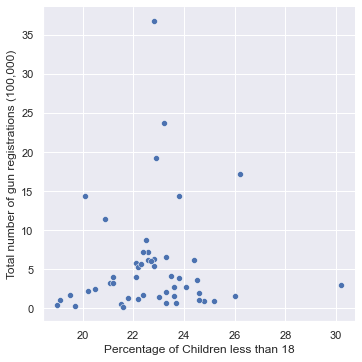

In [56]:
df_census[6]

sns.relplot(x = df_census[6], y = total_guns_2016/1e5)

plt.xlabel('Percentage of Children less than 18')
plt.ylabel('Total number of gun registrations (100,000)')
print('Correlation coefficient = ', df_census[6].corr(total_guns_2016));

So not really, there doesn't seem to be a correlation 

<a id='Q5'></a>
### Research Question 5  How do the states with most total registrations in this data perform over time?

First, we look at the total gun registrations per state

In [57]:
df.groupby('state')['totals'].sum().sort_values(ascending=False)

state
Kentucky          29762434
Texas             19435186
California        19014063
Illinois          15471534
Pennsylvania      13133876
Florida           11695777
Ohio               8462744
North Carolina     7777689
Indiana            7737172
Tennessee          7311293
Michigan           7254279
Georgia            7209942
Alabama            6706079
Missouri           6549018
Washington         6384517
Minnesota          6279271
Colorado           6058482
Virginia           5878675
Wisconsin          5131725
Louisiana          4705057
New York           4643828
Oklahoma           4584454
Arizona            4425714
Utah               4338273
South Carolina     4014432
Arkansas           3752633
Oregon             3751061
Mississippi        3576312
West Virginia      3208889
Connecticut        3168126
Kansas             2624669
Massachusetts      2571321
Iowa               2297156
New Mexico         2076591
Maryland           2035652
Idaho              1968134
Montana            188

Kentucky! I never would have guessed that. Now let's take out those highest 5 states and see their total registrations each year over time

Text(0.5, 1.0, 'Total gun registerations per year')

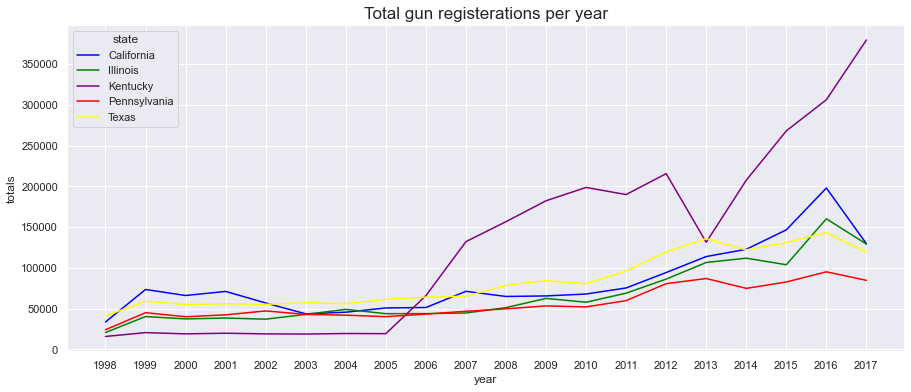

In [58]:
g = sns.lineplot(data = df[df['state'].isin(['Kentucky', 'Texas', 'California', 'Illinois', 'Pennsylvania'])], 
             x = 'year', 
             y = 'totals', hue= 'state', ci = None, palette= ['blue', 'green', 'purple', 'red', 'yellow'])

g.invert_xaxis() #if you remove this, graph is shown in reverse dating

sns.set(rc={"figure.figsize":(15, 6)})
plt.title('Total gun registerations per year', fontsize = 17)

Wow Kentucky seems to be losing it lol. Up, up they go. Here's a discussion from 2009 explaining the possible reason why there's so much gun registrations there

[Click here](https://www.calguns.net/calgunforum/showthread.php?t=180683)

[Here's an article that contains "For many Kentuckians, guns are an element of the Commonwealth’s culture."](https://www.suhrelaw.com/blog/what-you-need-to-know-about-kentuckys-gun-laws/)

<a id='Q6'></a>
### Research Question 6  : Which states have the lowest total gun registrations per capita (2016)

To find this, we need to divide the total gun registrations by the population (2016).

>We have total gun registrations as the variable 'total_guns_2016'

>Each state's population is in the column 0 of the census data (df_census[0])

In [59]:
total_guns_2016.sort_values(ascending = False).head()

state
Kentucky      3676847
California    2377167
Illinois      1924070
Texas         1721726
Indiana       1436725
Name: totals, dtype: int64

In [60]:

gun_reg_per_capita = (total_guns_2016/df_census[0]).sort_values(ascending = False)
gun_reg_per_capita

state
Kentucky          0.828683
Indiana           0.216601
Illinois          0.150300
West Virginia     0.132352
Montana           0.130776
South Dakota      0.129321
Alabama           0.126858
New Hampshire     0.123737
Alaska            0.118140
Minnesota         0.118044
Wyoming           0.108615
Tennessee         0.107466
Missouri          0.103778
Washington        0.097969
Colorado          0.097556
Wisconsin         0.097222
Utah              0.096652
North Dakota      0.095040
Oklahoma          0.092923
Idaho             0.092888
Mississippi       0.092401
Pennsylvania      0.089424
Arkansas          0.089020
Connecticut       0.088829
Maine             0.083803
Louisiana         0.083703
South Carolina    0.081227
Oregon            0.079324
New Mexico        0.077470
Ohio              0.075400
Florida           0.069635
Kansas            0.067605
Iowa              0.064528
Vermont           0.063108
Virginia          0.062813
Delaware          0.062422
Texas             0.06

Oh my days. What in the world is going on in Kentucky? for every 10 persons, there's 8 gun registrations. These guys are ready for war whenever! Let's visualise this

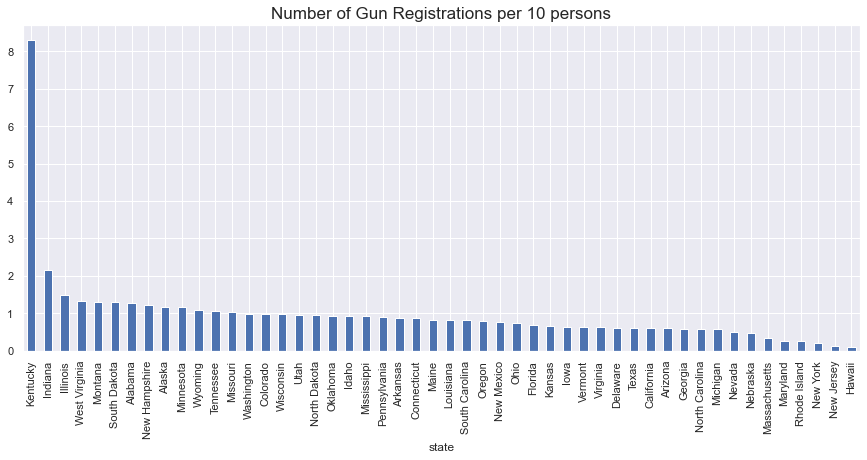

In [61]:
(gun_reg_per_capita*10).plot(kind= 'bar')

plt.title('Number of Gun Registrations per 10 persons', fontsize = 17);

<a id='conclusions'></a>
## Conclusions



> So many guns in Kentucky. The growth rate of gun registrations there was impeccable in the 19 years of this data. I'll probably look into some gun voilence data to see if Kentucky wins there too. December seems to be the period where guns are sold the most, Which is quite reasonable because in the part of the world where I am, there's a lot of insecurity at this time, for some reason



## Limitations
Not all gun sales are registered, so this may not give an accurate idea of exactly how guns move in the US.